In [1]:
import cv2

#Setup the enviorment by linking to the Haar Cascades Models

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [2]:
img = cv2.imread(r'C:\Users\YongTaek\Desktop\untitled.png')

# Resize the image to save space and be more manageable.
# We do this by calculating the ratio of the new image to the old image
r = 500.0 / img.shape[1]
dim = (500, int(img.shape[0] * r))

#Perform the resizing and store the resized image in variable resized
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#Display the image
cv2.imshow('image',resized)
cv2.waitKey(0) #Before moving on, wait for a keyboard click.

-1

In [3]:
#Process the image - convert to BRG to grey
grey = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

cv2.imshow('image',grey)
cv2.waitKey(0) #Before moving on, wait for a keyboard click.#Identify the face and eye using the haar-based classifiers.
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

In [4]:
#Identify the face and eye using the haar-based classifiers.
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(resized,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = resized[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#Display the bounding box for the face and eyes
cv2.imshow('img',resized)
cv2.waitKey(0)

-1

In [5]:
import pandas as pd
import numpy as np
#Identify the face and eye using the haar-based classifiers.
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(resized,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = resized[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
p_pan=pd.DataFrame(eyes).iloc[:,1:]
p_pan=pd.DataFrame(eyes).T
p_pan=abs(p_pan.corr(method='pearson'))
filter_pan = p_pan[(p_pan<1) & (p_pan>0.9)]
cal_pan=filter_pan.sum() > 0.9
cal_pan.index[cal_pan]
eyes=eyes[cal_pan.index[cal_pan],:]

for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
#Display the bounding box for the face and eyes

cv2.imshow('img',resized)
cv2.waitKey(0)

-1

### 여러명 얼굴인식

In [134]:
'''
import cv2

#Setup the enviorment by linking to the Haar Cascades Models

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

#Identify the image of interest to import. Ensure that when you import a file path
#that you do not use / in front otherwise it will return empty.
img = cv2.imread('data/dan3.jpg')

# Resize the image to save space and be more manageable.
# We do this by calculating the ratio of the new image to the old image
r = 500.0 / img.shape[1]
dim = (500, int(img.shape[0] * r))

# Perform the resizing and show
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

#Display the image
cv2.imshow('image',resized)
cv2.waitKey(0) #Before moving on, wait for a keyboard click.


#Process the image - convert to BRG to grey
grey = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

cv2.imshow('image',grey)
cv2.waitKey(0) #Before moving on, wait for a keyboard click.

#Identify the face and eye using the haar-based classifiers.
faces = face_cascade.detectMultiScale(grey, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(resized,(x,y),(x+w,y+h),(255,0,0),2)
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = resized[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_grey)
for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

#Display the bounding box for the face and eyes
cv2.imshow('img',resized)
cv2.waitKey(0)
'''

"\nimport cv2\n\n#Setup the enviorment by linking to the Haar Cascades Models\n\nface_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')\neye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')\n\n#Identify the image of interest to import. Ensure that when you import a file path\n#that you do not use / in front otherwise it will return empty.\nimg = cv2.imread('data/dan3.jpg')\n\n# Resize the image to save space and be more manageable.\n# We do this by calculating the ratio of the new image to the old image\nr = 500.0 / img.shape[1]\ndim = (500, int(img.shape[0] * r))\n\n# Perform the resizing and show\nresized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)\n\n#Display the image\ncv2.imshow('image',resized)\ncv2.waitKey(0) #Before moving on, wait for a keyboard click.\n\n\n#Process the image - convert to BRG to grey\ngrey = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)\n\ncv2.imshow('image',grey)\ncv2.waitKey(0) #Before moving on, wa

## OpenCv 알고리즘(용택 버젼)

In [156]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def Opencv(directory):
    #Setup the enviorment by linking to the Haar Cascades Models

    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

    img = cv2.imread(directory)

    # Resize the image to save space and be more manageable.
    # We do this by calculating the ratio of the new image to the old image
    r = 500.0 / img.shape[1]
    dim = (500, int(img.shape[0] * r))
    w_size = 0
    h_size = 0
    #Perform the resizing and store the resized image in variable resized
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    grey = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)


    #Identify the face and eye using the haar-based classifiers.
    faces = face_cascade.detectMultiScale(grey, 1.3, 5)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(resized,(x,y),(x+w,y+h),(255,0,0),2)
        roi_grey = grey[y:y+h, x:x+w]
        roi_color = resized[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_grey)
    x, y, w, h = faces[0]
    
    if eyes.shape[0] <= 1 :
        w_size = 0
        h_size = 0
    else:
        w_size = int(2/5 * w)
        h_size = int(1/50 * h)
        
        p_pan=pd.DataFrame(eyes).iloc[:,1:]
        p_pan=pd.DataFrame(eyes).T
        p_pan=abs(p_pan.corr(method='pearson'))

        #print(p_pan)
        filter_pan = p_pan[(p_pan<1) & (p_pan>0.6)]
        cal_pan=filter_pan.sum() > 0.6
        cal_pan.index[cal_pan]
        
        #print(cal_pan)
        eyes=eyes[cal_pan.index[cal_pan],:]
        
        #y값을 비교해서 boundury 안에 있으면 x값이 가장작은 행선택
        if((eyes[0,1] > eyes[1,1]-5) | (eyes[0,1] < eyes[1,1] +5)):
            eyes = [eyes[np.argmin(eyes[:,0]),:]]
        
        #아니면 y값이 가장작은 행 선택.
        else:
            eyes=[eyes[np.argmin(eyes[:,1]),:]]
            
    
        for (ex,ey,ew,eh) in eyes :
            img=cv2.rectangle(roi_color,(ex-7,ey-7),(ex+ew+w_size,ey+eh+h_size),(0,0,0),0)
    #Display the bounding box for the face and eyes
    
    #print(eyes[0])
        plt.imshow(img[ey-4 : ey+eh+h_size, ex-5: ex+ew+w_size])
    #cv2.imshow('img',resized)
    #cv2.waitKey(0)
        cv2.imwrite("./dd_01.jpg",img[ey-5 : ey+eh+h_size, ex-5: ex+ew+w_size])

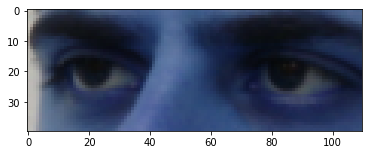

In [157]:
# Detection 실험
Opencv(r'C:\Users\YongTaek\Desktop\originalimages_part1\1-04.jpg')

In [94]:
cv2.imwrite("./dd_01.jpg",img)

True

## 내가가지고 있는 이미지 파일 전부 디텍션해서 자르기

In [2]:
import os

In [3]:
path_dir = r'C:\Users\YongTaek\Desktop\originalimages_part1'

In [4]:
file_list = os.listdir(path_dir)

In [5]:
for i in file_list:
    print(i)

1-01.jpg
1-02.jpg
1-03.jpg
1-04.jpg
1-05.jpg
1-06.jpg
1-07.jpg
1-08.jpg
1-09.jpg
1-10.jpg
1-11.jpg
1-12.jpg
1-13.jpg
1-14.jpg
10-01.jpg
10-02.jpg
10-03.jpg
10-04.jpg
10-05.jpg
10-06.jpg
10-07.jpg
10-08.jpg
10-09.jpg
10-10.jpg
10-11.jpg
10-12.jpg
10-13.jpg
10-14.jpg
11-01.jpg
11-02.jpg
11-03.jpg
11-04.jpg
11-05.jpg
11-06.jpg
11-07.jpg
11-08.jpg
11-09.jpg
11-10.jpg
11-11.jpg
11-12.jpg
11-13.jpg
11-14.jpg
12-01.jpg
12-02.jpg
12-03.jpg
12-04.jpg
12-05.jpg
12-06.jpg
12-07.jpg
12-08.jpg
12-09.jpg
12-10.jpg
12-11.jpg
12-12.jpg
12-13.jpg
12-14.jpg
13-01.jpg
13-02.jpg
13-03.jpg
13-04.jpg
13-05.jpg
13-06.jpg
13-07.jpg
13-08.jpg
13-09.jpg
13-10.jpg
13-11.jpg
13-12.jpg
13-13.jpg
13-14.jpg
14-01.jpg
14-02.jpg
14-03.jpg
14-04.jpg
14-05.jpg
14-06.jpg
14-07.jpg
14-08.jpg
14-09.jpg
14-10.jpg
14-11.jpg
14-12.jpg
14-13.jpg
14-14.jpg
15-01.jpg
15-02.jpg
15-03.jpg
15-04.jpg
15-05.jpg
15-06.jpg
15-07.jpg
15-08.jpg
15-09.jpg
15-10.jpg
15-11.jpg
15-12.jpg
15-13.jpg
15-14.jpg
16-01.jpg
16-02.jpg
16-03.jpg
16-0